# Association Rule for Store Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

! pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

## Load Data

Load data dan tunjukan 5 row pertamanya

Dataset :
https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv

In [2]:
# load the data set ans show the first five transaction
link = 'https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv'
dt = pd.read_csv(link)
dt.head(5)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


<h2> EDA

In [8]:
dt.isna().sum()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [9]:
dt.duplicated().sum()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


759

In [11]:
dt.drop_duplicates(inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
dt.duplicated().sum()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

<h2> Data Preprocessing

Ubahlah dataset di atas menjadi bentuk one hot encoding. Asumsikanlah bahwa pembelian barang yang dilakukan oleh Customer ID yang sama dalam hari yang sama terjadi dalam 1 transaksi yang sama (satu Order ID)

contoh :
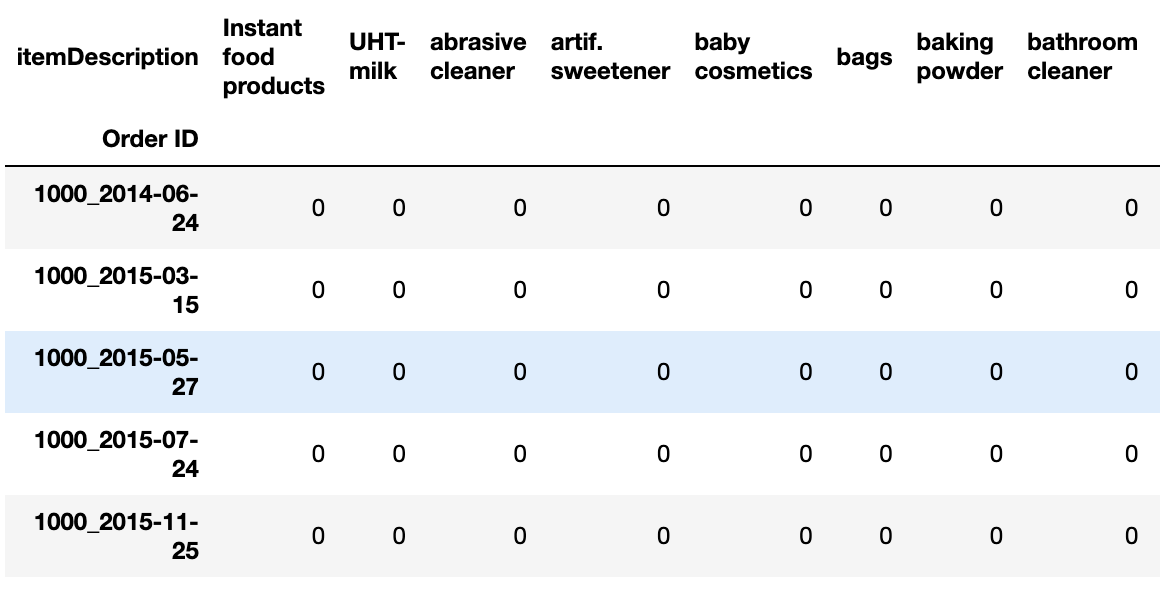

In [14]:
items = set()
for col in dt:
    items.update(dt[col].unique())
print(items)

{0, 1, 2, 3, 4, '2015-04-21', 5, 7, 8, '2014-08-05', 9, 11, 12, 10, 6, 14, 13, 17, 18, 19, 20, 21, 22, 'pastry', 23, 24, 26, 27, 25, '2015-08-30', 30, 29, 28, 31, '2015-01-12', '2014-12-12', '2014-10-14', '2015-04-24', 15, 'cream cheese ', 16, '2015-01-20', '2014-07-25', '2015-02-28', '2015-05-07', '2015-06-23', 'dog food', '2014-07-24', '2015-08-03', '2014-02-05', 'soft cheese', '2015-05-12', '2014-01-15', '2015-10-30', '2015-11-11', 'frozen chicken', '2015-04-30', '2014-08-09', 'frozen fruits', '2014-04-20', '2014-12-23', '2015-03-10', '2015-08-25', '2015-10-08', '2014-11-09', '2014-11-01', '2014-08-25', '2014-08-08', 'honey', '2014-05-23', 'flower soil/fertilizer', 'rolls/buns', '2015-11-27', '2015-05-09', 'detergent', '2014-07-21', '2014-10-16', '2015-12-16', 'kitchen towels', '2014-09-24', '2014-11-02', '2014-02-23', '2015-09-20', 'condensed milk', '2014-02-19', '2014-07-06', 'salad dressing', '2014-08-29', '2014-09-11', '2015-06-03', '2014-07-03', '2014-02-15', '2014-11-20', '201

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#create an itemset based on the products
itemset = set(items)
encoded_vals = []
# encoding the feature
for index, row in dt.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# create new dataframe from the encoded features
new_dt = pd.DataFrame(encoded_vals)
# show the new dataframe
new_dt.head(5)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,2,3,4,5,6,8,9,10,11,...,2014-11-07,2015-01-02,liquor,1,7,1808,2015-07-21,21,tropical fruit,2015
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Apriori Algorithm

Gunakanlah algroitma apriori untuk mencari tahu produk mana yang sering dibeli secara bersama-sama (min support = 0.01)

In [18]:
freq_items = apriori(new_dt, min_support=0.01, use_colnames=True, verbose=1)
freq_items

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\USER\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 324 combinations | Sampling itemset size 43


,support,itemsets
0,0.136899,(0)
1,0.237147,(2)
2,0.245146,(3)
3,0.240252,(4)
4,0.238226,(5)
...,...,...
294,0.011893,"(8, 1, 2015)"
295,0.012261,"(1, 10, 2015)"
296,0.010867,"(1, 11, 2015)"
297,0.010314,"(1, 12, 2014)"


Berdasarkan hasil di atas, buatlah association rules nya dengan syarat min confidence = 0.1 

In [19]:
ar = association_rules(freq_items, metric="confidence", min_threshold=0.1)
ar

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(2),0.136899,0.237147,0.015576,0.113781,0.479789,-0.016889,0.860795
1,(0),(3),0.136899,0.245146,0.017629,0.128772,0.525287,-0.015931,0.866426
2,(0),(6),0.136899,0.239909,0.018392,0.134346,0.559984,-0.014452,0.878053
3,(0),(8),0.136899,0.121849,0.016392,0.119739,0.982679,-0.000289,0.997602
4,(8),(0),0.121849,0.136899,0.016392,0.134528,0.982679,-0.000289,0.997260
...,...,...,...,...,...,...,...,...,...
407,"(1, 12)",(2014),0.019102,0.474346,0.010314,0.539945,1.138293,0.001253,1.142589
408,"(12, 2014)",(1),0.052571,0.241330,0.010314,0.196196,0.812978,-0.002373,0.943849
409,"(1, 7)",(2015),0.020944,0.525785,0.011788,0.562814,1.070425,0.000776,1.084698
410,"(2015, 7)",(1),0.058359,0.241330,0.011788,0.201984,0.836960,-0.002296,0.950695
